Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [2]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("temperature.csv")
df.T

0           1            2            3     \
station                   1.0         2.0          3.0          4.0   
Date               30-06-2013  30-06-2013   30-06-2013   30-06-2013   
Present_Tmax             28.7        31.9         31.6         32.0   
Present_Tmin             21.4        21.6         23.3         23.4   
LDAPS_RHmin         58.255688   52.263397    48.690479    58.239788   
LDAPS_RHmax         91.116364   90.604721    83.973587    96.483688   
LDAPS_Tmax_lapse    28.074101   29.850689    30.091292    29.704629   
LDAPS_Tmin_lapse    23.006936   24.035009    24.565633    23.326177   
LDAPS_WS             6.818887     5.69189     6.138224      5.65005   
LDAPS_LH            69.451805   51.937448     20.57305    65.727144   
LDAPS_CC1            0.233947    0.225508     0.209344     0.216372   
LDAPS_CC2            0.203896    0.251771     0.257469     0.226002   
LDAPS_CC3            0.161697    0.159444     0.204091     0.161157   
LDAPS_CC4            0.130928    0.127727     0.142125     0.134249   
LDAPS_PPT1                0.0         0.0          0.0          0.0   
LDAPS_PPT2                0.0         0.0          0.0          0.0   
LDAPS_PPT3                0.0         0.0          0.0          0.0   
LDAPS_PPT4                0.0         0.0          0.0          0.0   
lat                   37.6046     37.6046      37.5776       37.645   
lon                   126.991     127.032      127.058      127.022   
DEM                   212.335     44.7624      33.3068       45.716   
Slope                   2.785      0.5141       0.2661       2.5348   
Solar radiation   5992.895996   5869.3125  5863.555664  5856.964844   
Next_Tmax                29.1        30.5         31.1         31.7   
Next_Tmin                21.2        22.5         23.9         24.3   

                         4            5            6            7     \
station                   5.0          6.0          7.0          8.0   
Date               30-06-2013   30-06-2013   30-06-2013   30-06-2013   
Present_Tmax             31.4         31.9         31.4         32.1   
Present_Tmin             21.9         23.5         24.4         23.6   
LDAPS_RHmin         56.174095    52.437126    56.287189    52.326218   
LDAPS_RHmax         90.155128    85.307251     81.01976    78.004539   
LDAPS_Tmax_lapse    29.113934    29.219342    28.551859    28.851982   
LDAPS_Tmin_lapse     23.48648    23.822613    24.238467    23.819054   
LDAPS_WS             5.735004     6.182295     5.587135     6.104417   
LDAPS_LH           107.965535    50.231389   125.110007    42.011547   
LDAPS_CC1            0.151407     0.185279       0.3896     0.357856   
LDAPS_CC2            0.249995     0.280818      0.33357     0.344928   
LDAPS_CC3            0.178892     0.232841     0.270419     0.272387   
LDAPS_CC4            0.170021     0.146363     0.145705     0.143841   
LDAPS_PPT1                0.0          0.0          0.0          0.0   
LDAPS_PPT2                0.0          0.0          0.0          0.0   
LDAPS_PPT3                0.0          0.0          0.0          0.0   
LDAPS_PPT4                0.0          0.0          0.0          0.0   
lat                   37.5507      37.5102      37.5776      37.4697   
lon                   127.135      127.042      126.838       126.91   
DEM                    35.038      54.6384        12.37       52.518   
Slope                  0.5055       0.1457       0.0985       1.5629   
Solar radiation   5859.552246  5873.780762  5849.233398  5863.992188   
Next_Tmax                31.2         31.5         30.9         31.1   
Next_Tmin                22.5         24.0         23.4         22.9   

                         8            9     ...         7742         7743  \
station                   9.0         10.0  ...         18.0         19.0   
Date               30-06-2013   30-06-2013  ...   30-08-2017   30-08-2017   
Present_Tmax             31.4         31.6  ...         23.3         22.6 

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

above is the list of all columns.

In [5]:
df.shape

(7752, 25)

Our dataset has 7752 rows and 25 columns.

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except date column, all other columns are object type column.

Let's drop the Date columns.

In [7]:
df.drop('Date', axis=1, inplace=True)

In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Our dataset does contains null values. Let's see the same thing with the help of heatmap.

<AxesSubplot:>

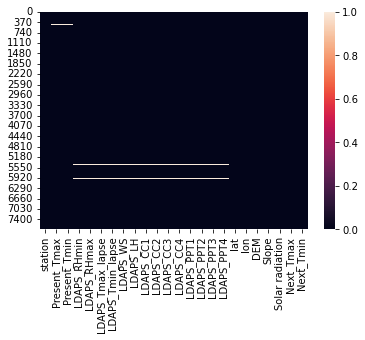

In [9]:
sns.heatmap(df.isnull())

 
We have replaced null values of all columns with mean.

In [10]:
#We have replaced null values of all columns with mean
for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean(),inplace=True)

<AxesSubplot:>

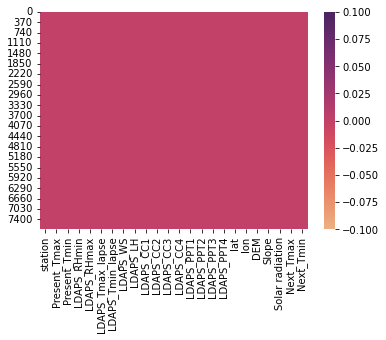

In [11]:
sns.heatmap(df.isnull(),cmap="flare")

No null value present in our datasets.

In [12]:
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

In LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 columns we get information of LDAPS model forecast of next-day with 6-6 hours split average cloud cover. Lets take average of this column at one place

In [13]:
#df['LDAPS_CC']=(df['LDAPS_CC1']+df['LDAPS_CC2']+df['LDAPS_CC3']+df['LDAPS_CC4'])/4
df['LDAPS_CC'] = df[['LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']].mean(axis=1)

In LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 columns we get information of LDAPS model forecast of next-day with 6-6 hours split average precipitation. Lets take average of this column at one place

In [14]:
df['LDAPS_PPT'] = df[['LDAPS_PPT1', 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']].mean(axis=1)

Now let's drop the previous columns which are not required now:

In [15]:
list=['LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
df.drop(list, axis=1, inplace=True)

# Let's do some Viasualization:

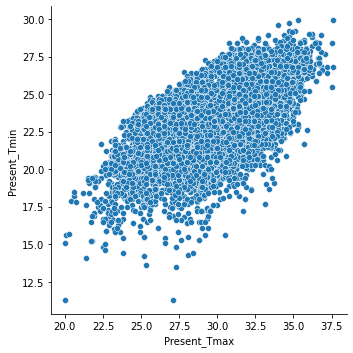

In [16]:
sns.relplot(x='Present_Tmax',y='Present_Tmin',data=df, kind='scatter')

We can see positive linear relation between Present_Tmax and Present_Tmin.

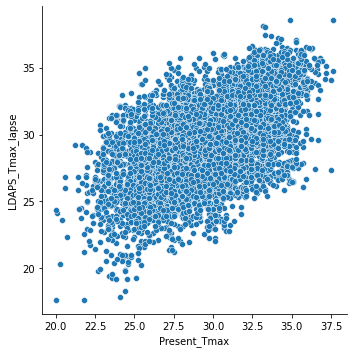

In [17]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmax_lapse',data=df, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmax_lapse.

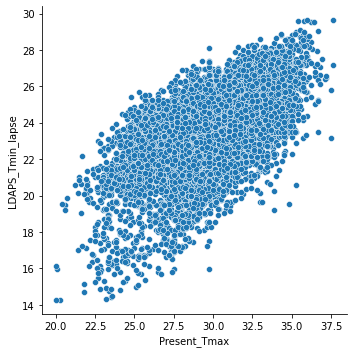

In [18]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmin_lapse',data=df, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmin_lapse.

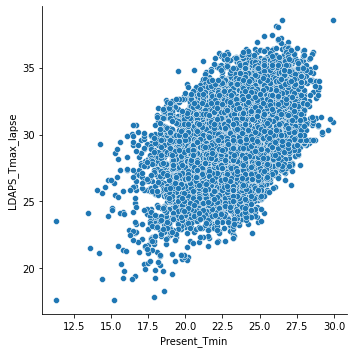

In [19]:
sns.relplot(x='Present_Tmin', y='LDAPS_Tmax_lapse',data=df, kind='scatter')

We can see positive linear relation between Present_Tmin and LDAPS_Tmax_lapse.

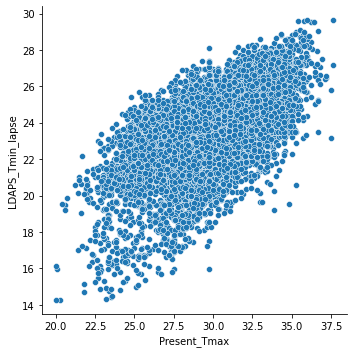

In [20]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmin_lapse',data=df, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmin_lapse.

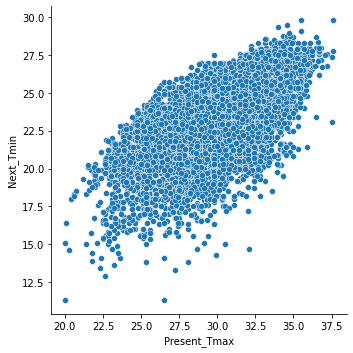

In [21]:
sns.relplot(x='Present_Tmax', y='Next_Tmin',data=df, kind='scatter')

We can see positive linear relation between Present_Tmax and Next_Tmin.

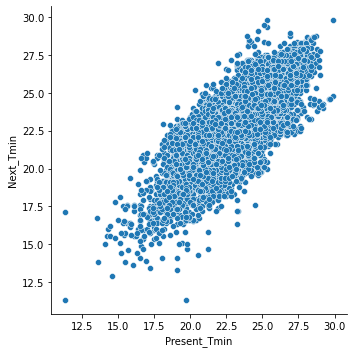

In [22]:
sns.relplot(x='Present_Tmin', y='Next_Tmin',data=df, kind='scatter')

We can see positive linear relation between Present_Tmin and Next_Tmin

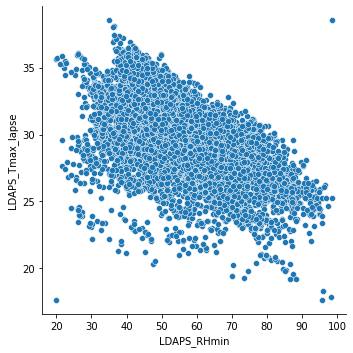

In [23]:
sns.relplot(x='LDAPS_RHmin', y='LDAPS_Tmax_lapse',data=df, kind='scatter')

We can see negative relation between LDAPS_RHmin and LDAPS_Tmax_lapse.

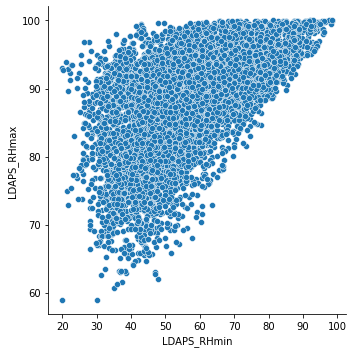

In [24]:
sns.relplot(x='LDAPS_RHmin', y='LDAPS_RHmax',data=df, kind='scatter')

We can see positive relation between LDAPS_RHmin and LDAPS_RHmax.

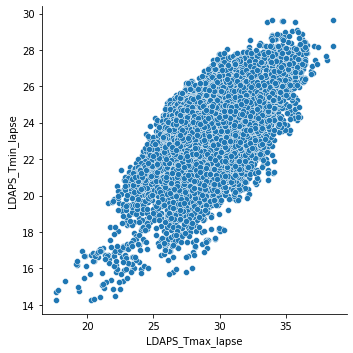

In [25]:
sns.relplot(x='LDAPS_Tmax_lapse', y='LDAPS_Tmin_lapse',data=df, kind='scatter')

We can see positive relation between LDAPS_Tmax_lapse and LDAPS_Tmin_lapse.

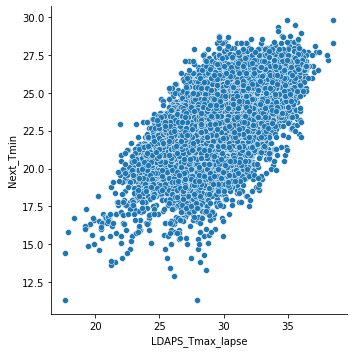

In [26]:
sns.relplot(x='LDAPS_Tmax_lapse', y='Next_Tmin',data=df, kind='scatter')

We can see positive relation between LDAPS_Tmax_lapse and Next_Tmin.

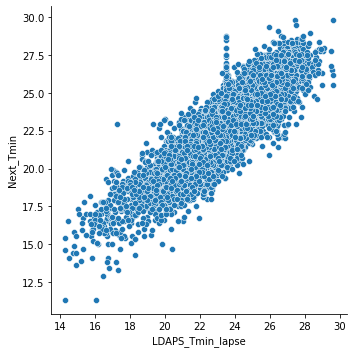

In [27]:
sns.relplot(x='LDAPS_Tmin_lapse', y='Next_Tmin',data=df, kind='scatter')

We can see positive relation between LDAPS_Tmin_lapse and Next_Tmin.

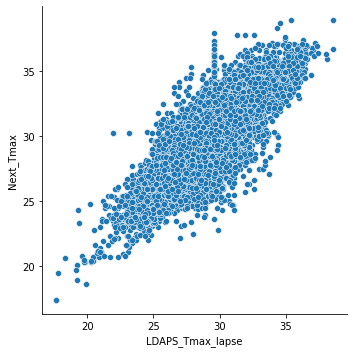

In [28]:
sns.relplot(x='LDAPS_Tmax_lapse', y='Next_Tmax',data=df,kind='scatter')

We can see positive linear relation between LDAPS_Tmax_lapse and Next_Tmax

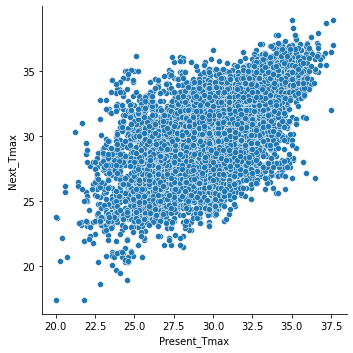

In [29]:
sns.relplot(x='Present_Tmax',y='Next_Tmax',data=df,kind='scatter')

Relation between Present_Tmax and Next_Tmax is also positive.

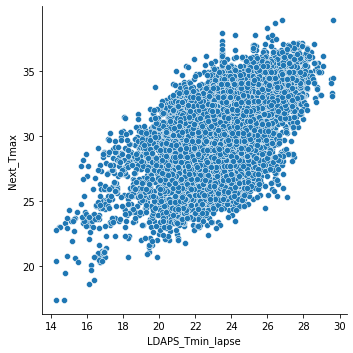

In [30]:
sns.relplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df,kind='scatter')

Relation between Present_Tmax and LDAPS_Tmin_lapse is also positive.

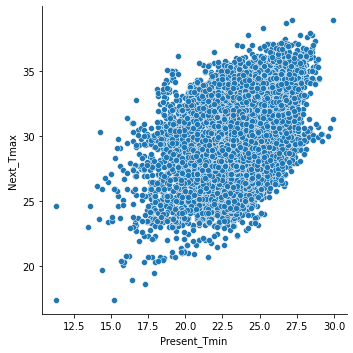

In [31]:
sns.relplot(x='Present_Tmin',y='Next_Tmax',data=df,kind='scatter')

We can see relationship between Present_Tmin and Next_Tmin is positive.

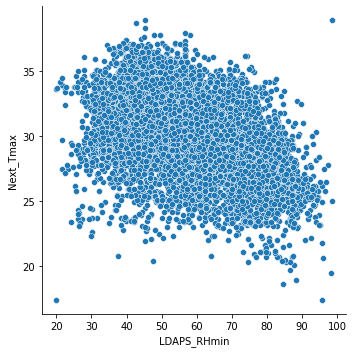

In [32]:
sns.relplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,kind='scatter')

We can see relationship between LDAPS_RHmin and Next_Tmax is negative.

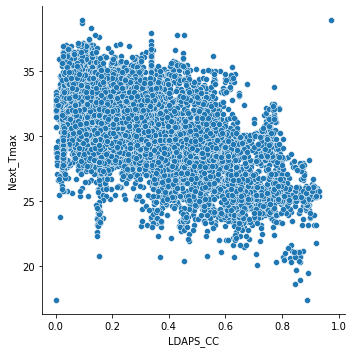

In [33]:
sns.relplot(x='LDAPS_CC',y='Next_Tmax',data=df,kind='scatter')

We can see relationship between LDAPS_CC and Next_Tmax is negative.

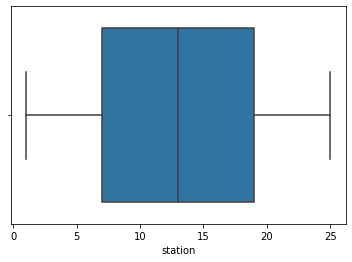

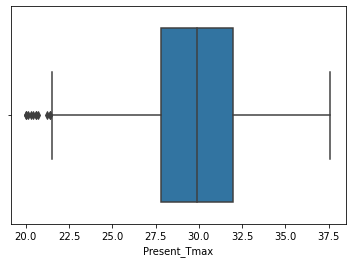

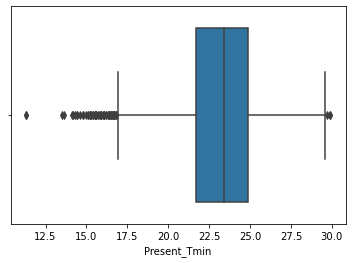

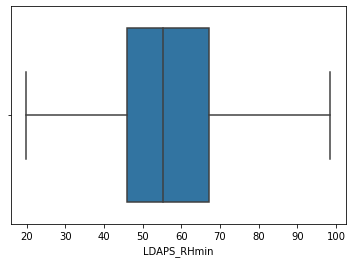

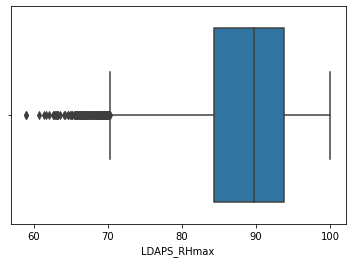

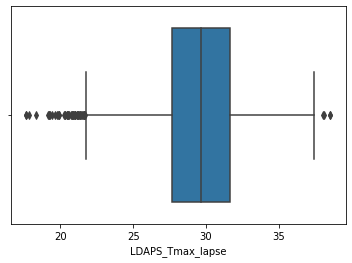

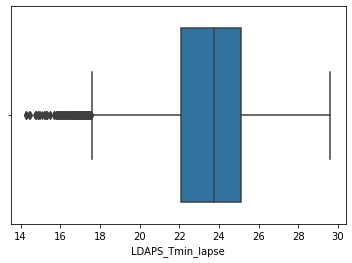

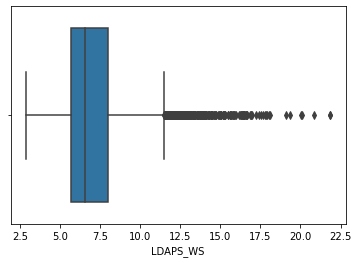

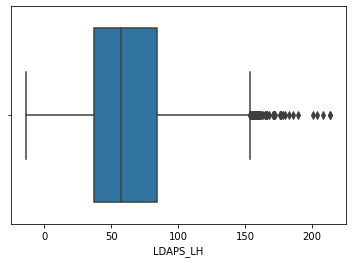

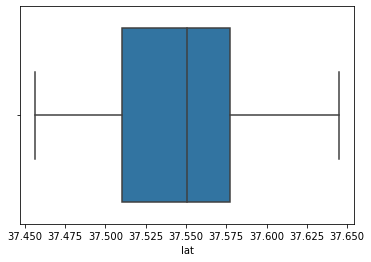

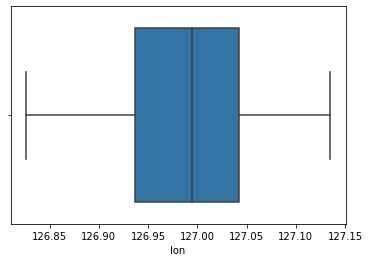

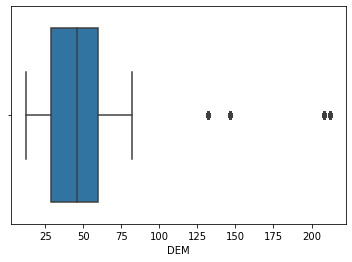

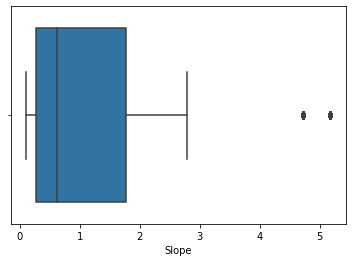

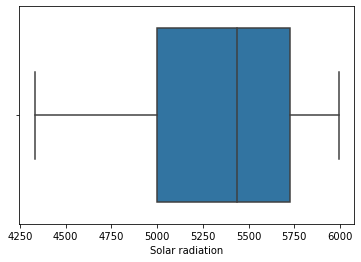

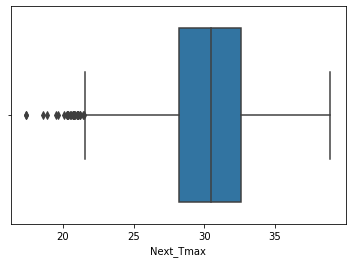

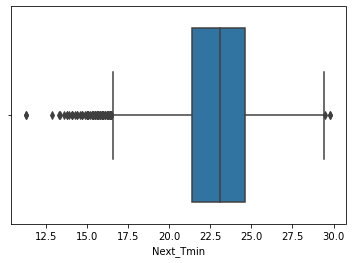

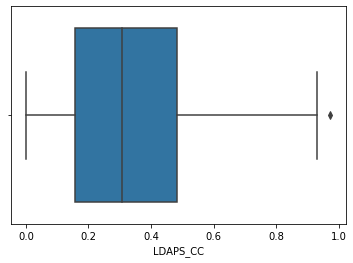

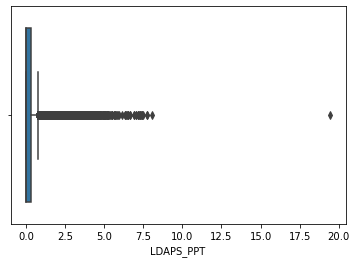

In [34]:
for i in df.columns:
        plt.figure()
        sns.boxplot(x=df[i])

We can see outliers in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT, DEM, Slope, Next_Tmax, Next_Tmin, LDAPS_CC, LDAPS_PPT.

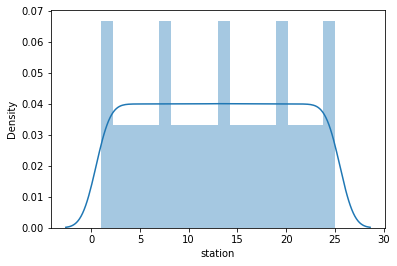

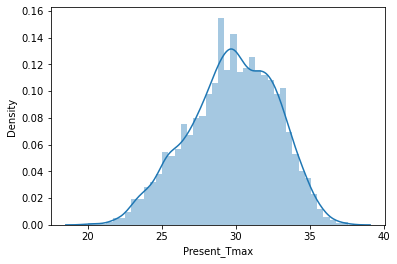

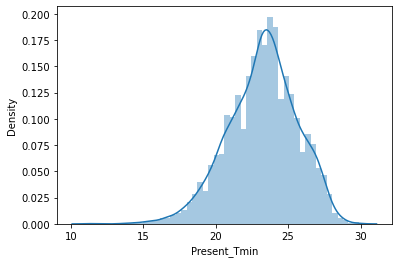

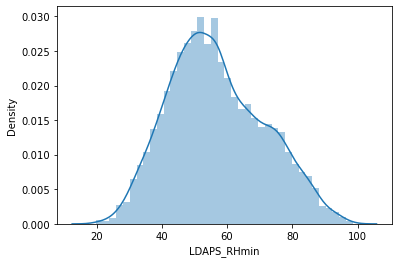

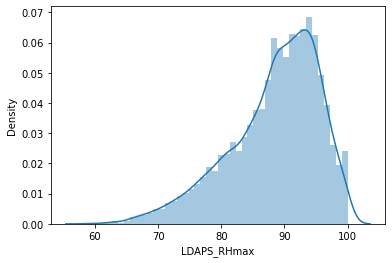

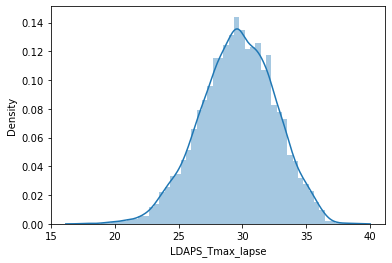

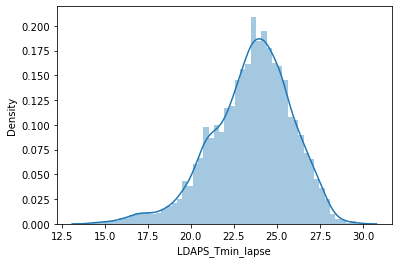

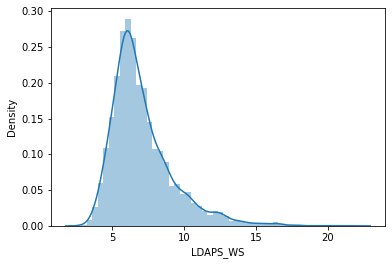

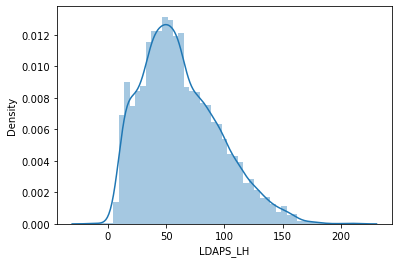

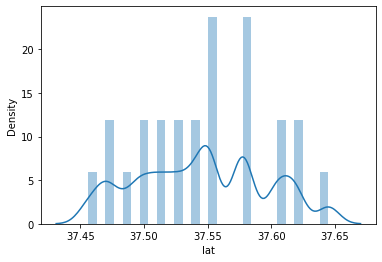

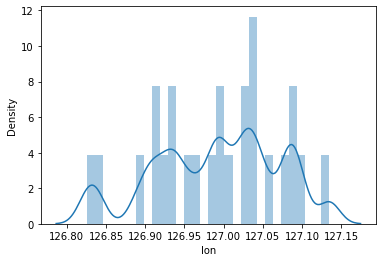

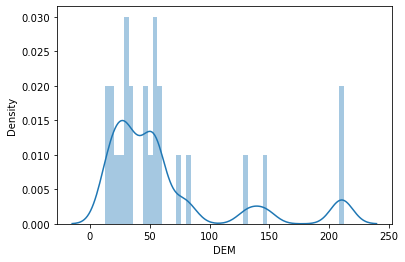

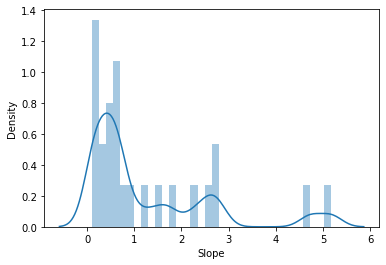

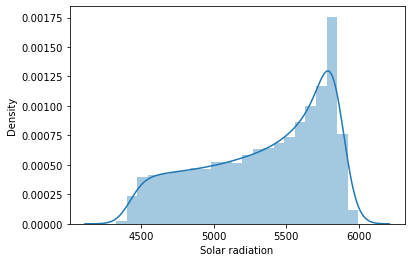

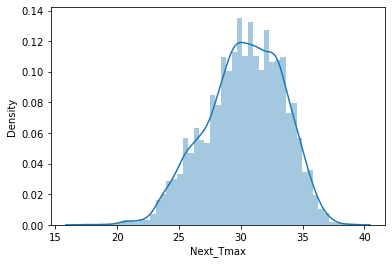

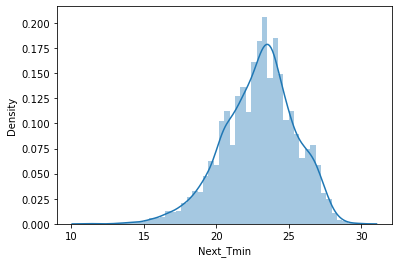

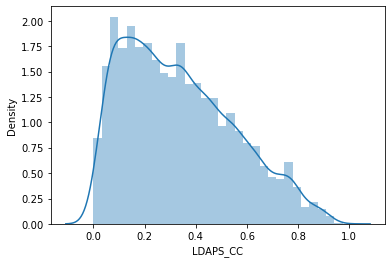

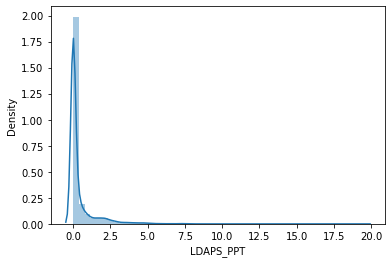

In [35]:
for i in df.columns:
        plt.figure()
        sns.distplot(df[i])

We can see uneven distribution in all columns.

In [36]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
LDAPS_CC            0.549589
LDAPS_PPT           4.229137
dtype: float64

skewness has present in our datasets.

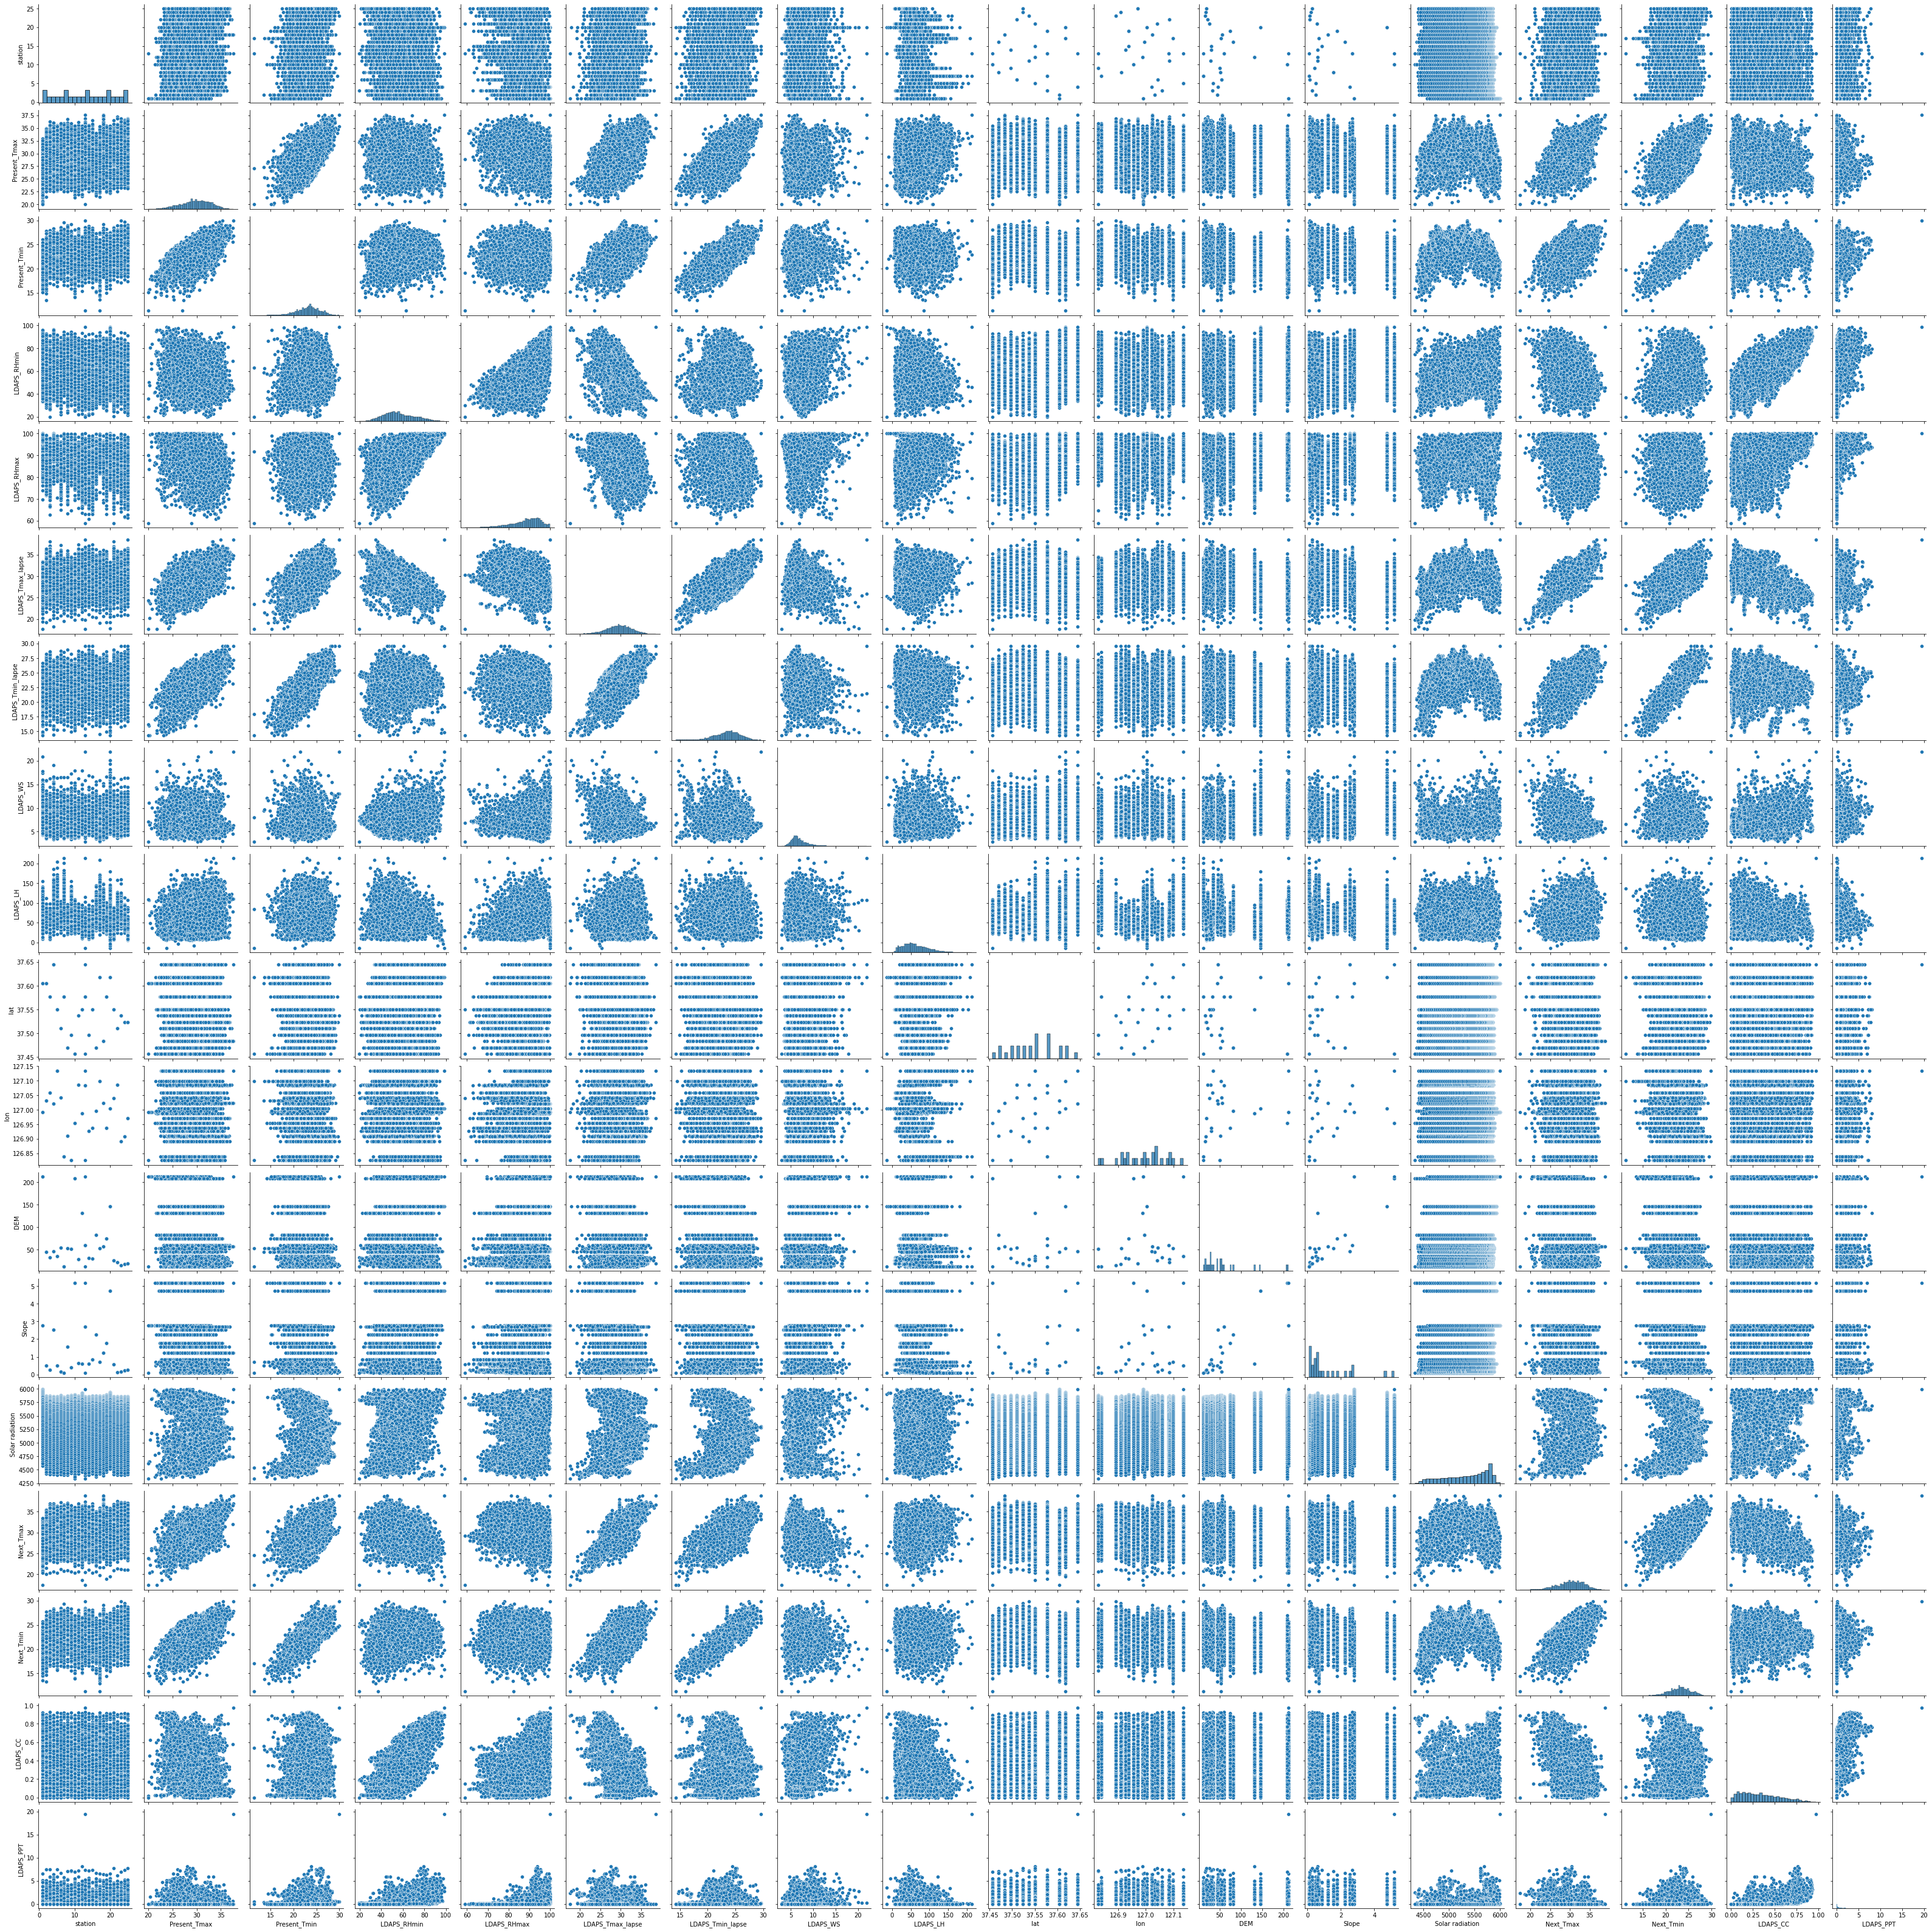

In [37]:
sns.pairplot(df)

In the above pairplot we can see relationship between all columns.

# describe the datasets:

In [38]:
df.describe().T

count         mean         std          min          25%  \
station           7752.0    13.000000    7.210637     1.000000     7.000000   
Present_Tmax      7752.0    29.768211    2.956557    20.000000    27.800000   
Present_Tmin      7752.0    23.225059    2.403036    11.300000    21.700000   
LDAPS_RHmin       7752.0    56.759372   14.596973    19.794666    46.046162   
LDAPS_RHmax       7752.0    88.374804    7.157124    58.936283    84.316923   
LDAPS_Tmax_lapse  7752.0    29.613447    2.932898    17.624954    27.693091   
LDAPS_Tmin_lapse  7752.0    23.512589    2.333973    14.272646    22.114651   
LDAPS_WS          7752.0     7.097875    2.173245     2.882580     5.686487   
LDAPS_LH          7752.0    62.505019   33.567001   -13.603212    37.532764   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7752.0    30.274887    3.122557    17.400000    28.200000   
Next_Tmin         7752.0    22.932220    2.483276    11.300000    21.400000   
LDAPS_CC          7752.0     0.335612    0.215288     0.000000     0.157205   
LDAPS_PPT         7752.0     0.406151    0.962324     0.000000     0.000000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.313244    67.038254    98.524734  
LDAPS_RHmax         89.699505    93.704500   100.000153  
LDAPS_Tmax_lapse    29.662273    31.683819    38.542255  
LDAPS_Tmin_lapse    23.735942    25.134000    29.619342  
LDAPS_WS             6.563068     8.007471    21.857621  
LDAPS_LH            57.310630    83.904586   213.414006  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000  
LDAPS_CC             0.305816     0.482564     0.973532  
LDAPS_PPT            0.003632     0.299138    19.454977

there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

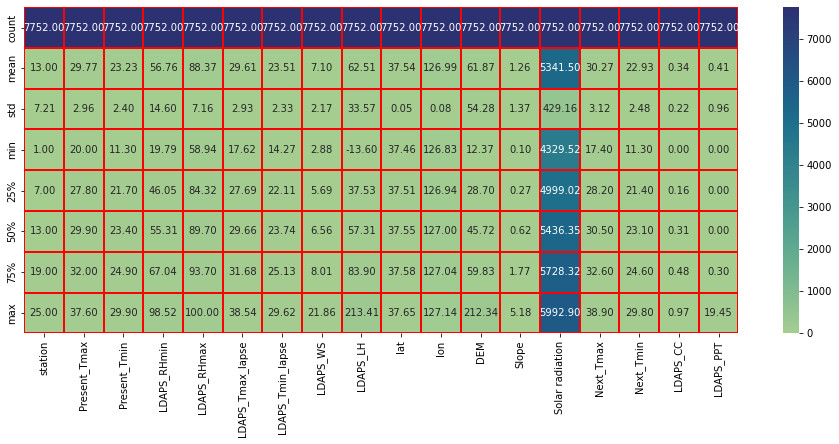

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="crest")

# Correlation of the columns with target columns:

In [40]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112655      0.131646    -0.066733   
Present_Tmax      0.112655      1.000000      0.618760    -0.204571   
Present_Tmin      0.131646      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066733     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166984     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069107      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.104758      0.623496      0.762993     0.089476   
LDAPS_WS          0.005277     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133357      0.135463     -0.009258    -0.070858   
lat              -0.237502     -0.052615     -0.078475     0.087099   
lon              -0.118704      0.009020     -0.043461    -0.076237   
DEM              -0.255830     -0.187121     -0.250275     0.102115   
Slope            -0.090061     -0.105809     -0.146339     0.123744   
Solar radiation  -0.019001     -0.025439      0.053578     0.244080   
Next_Tmax         0.107983      0.610348      0.471806    -0.437898   
Next_Tmin         0.128293      0.622741      0.796670     0.095019   
LDAPS_CC          0.005113     -0.241356      0.038697     0.759109   
LDAPS_PPT        -0.012109     -0.167371      0.054346     0.435161   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   
LDAPS_CC             0.353191         -0.571997         -0.018809  0.300771   
LDAPS_PPT            0.316607         -0.272695         -0.036582  0.257701   

                  LDAPS_LH       lat       lon       DEM     Slope  \
station          -0.133357 -0.237502 -0.118704 -0.255830 -0.090061   
Present_Tmax      0.135463 -0.052615  0.009020 -0.187121 -0.105809   
Present_Tmin     -0.009258 -0.078475 -0.043461 -0.250275 -0.146339   
LDAPS_RHmin      -0.070858  0.087099 -0.076237  0.102115  0.123744   
LDAPS_RHmax       0.238579  0.195798  0.025667  0.177168  0.219599   
LDAPS_Tmax_lapse  0.048010 -0.042093  0.090666 -0.178895 -0.162332   
LDAPS_Tmin_lapse -0.134761 -0.096257 -0.026701 -0.195455 -0.185849   
LDAPS_WS          0.006711  0.036657 -0.059466  0.191053  0.171629   
LDAPS_LH          1.000000  0.133221  0.025822  0.055133  0.086781   
lat               0.133221  1.000000  0.289029  0.033165  0.074763   
lon               0.025822  0.289029  1.000000  0.007587  0.038070   
DEM               0.055133  0.033165  0.007587  1.000000  0.783576   
Slope             0.086781  0.074763  0.038070  0.783576  1.000000   
Solar radiation  -0.047384  0.038513  0.002182  0.056224  0.028199   
Next_Tmax         0.157616 -0.053510  0.003052 -0.172538 -0.102725   
Next_Tmin        -0.055440 -0.083533 -0.046603 

<AxesSubplot:>

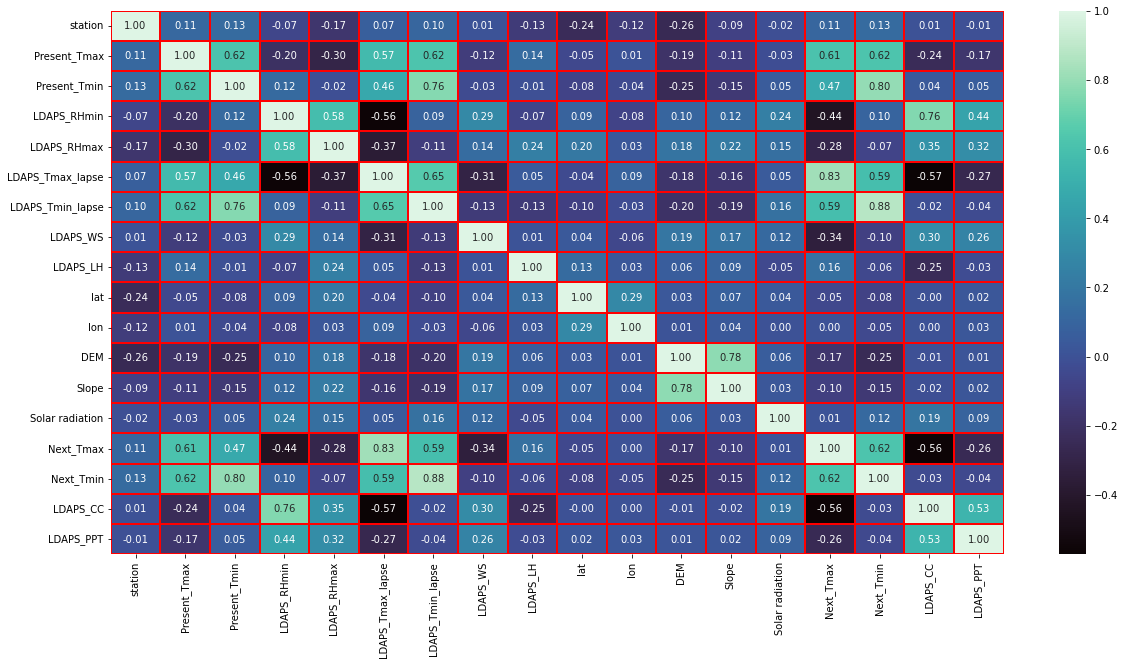

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="mako")

Checking the columns which are positively and negative correlated with the target columns:

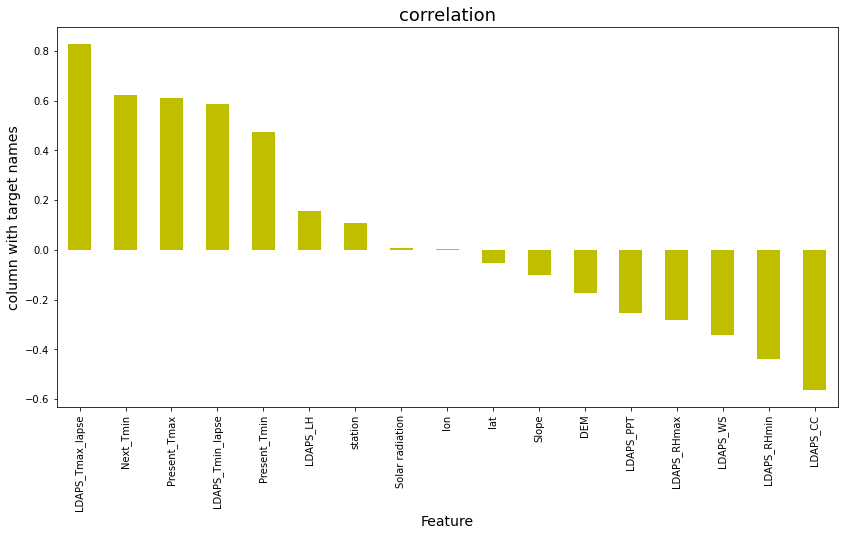

In [42]:
plt.figure(figsize=(14,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

solar radiation and ion is the very less correlation with the target column Next_Tmax.

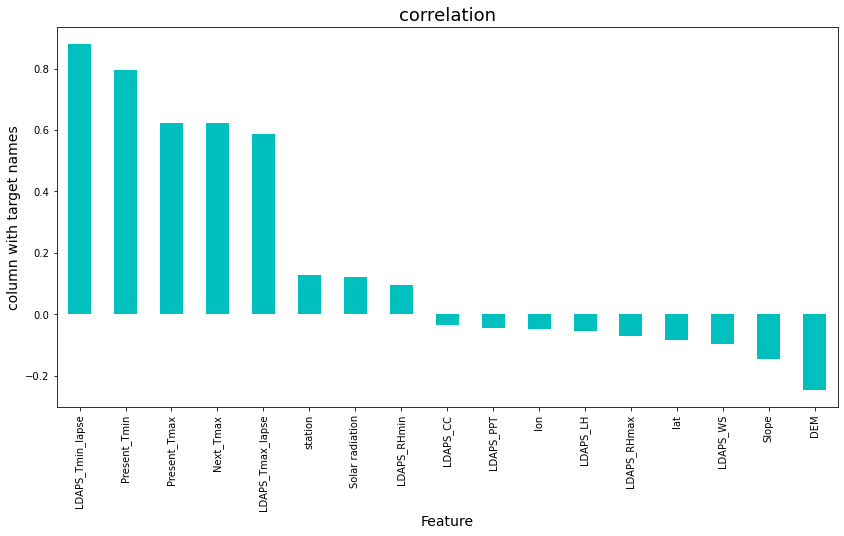

In [43]:
plt.figure(figsize=(14,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above figure we can see the some feature columns are very positive correlation with the Next_Tmin and some are negative correlation with the target columns

# outliers and Skewness removal:

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   26,   27,   33,   36,   37,   41,   44,   45,  175,  194,
         269,  294,  304,  305,  307,  308,  309,  310,  311,  313,  315,
         317,  320,  321,  322,  323,  324,  325,  326,  328,  331,  341,
         343,  344,  344,  375,  394,  419,  494,  519,  525,  526,  527,
         528,  529,  530,  531,  532,  533,  534,  535,  536,  537,  538,
         539,  540,  541,  542,  543,  544,  544,  545,  546,  547,  548,
         549,  569,  575,  584,  594,  969, 1006, 1018, 1225, 1226, 1227,
        1229, 1230, 1234, 1235, 1236, 1237, 1238, 1240, 1242, 1243, 1245,
        1246, 1248, 1249, 1324, 1424, 1494, 1652, 1661, 1663, 1664, 1670,
        1674, 1750, 1753, 1758, 1768, 1769, 1778, 1779, 1781, 1791, 1794,
        1981, 1982, 1984, 1990, 1992, 2175, 2176, 2177, 2178, 2179, 2179,
        2180, 2181, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189,
        2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2353,
        2354, 2356, 2369, 2375, 2378, 

In [45]:
df_new=df[(z<3).all(axis=1)]
df_new

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH      lat  \
0            28.074101         23.006936  6.818887   69.451805  37.6046   
1            29.850689         24.035009  5.691890   51.937448  37.6046   
2            30.091292         24.565633  6.138224   20.573050  37.5776   
3            29.704629         23.326177  5.650050   65.727144  37.6450   
4            29.113934         23.486480  5.735004  107.965535  37.5507   
...                ...               ...       ...         ...      ...   
7745         27.812697         18.303014  6.603253    9.614074  37.5507   
7746         26.704905         17.814038  5.768083   82.146707  37.5102   
7747         26.352081         18.775678  6.148918   72.058294  37.5372   
7748         27.010193         18.733519  6.542819   47.241457  37.5237   
7749         27.939516         18.522965  7.289264    9.090034  37.5237   

          lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0     126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1     127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2     127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3     127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4     127.135   35.0380  0.5055      5859.552246       31.2       22.5   
...       ...       ...     ...              ...        ...        ...   
7745  127.040   26.2980  0.5721      4456.024414       27.6       17.7   
7746  127.086   21.9668  0.1332      4441.803711       28.0       17.1   
7747  126.891   15.5876  0.1554      4443.313965       28.3       18.1   
7748  126.909   17.2956  0.2223      4438.373535       28.6       18.8   
7749  126.970   19.5844  0.2713      4451.345215       27.8       17.4   

      LDAPS_CC  LDAPS_PPT  
0     0.182617        0.0  
1     0.191113        0.0  
2     0.203257        0.0  
3     0.184445        0.0  
4     0.187579        0.0  
...        ...        ...  
7745  0.021863        0.0  
7746  0.027164        0.0  
7747  0.027767        0.0  
7748  0.027709        0.0  
7749  0.027405        0.0  

[7273 rows x 18 columns]

now remove all outliers

In [46]:
df_new.shape

(7273, 18)

In [47]:
df.shape

(7752, 18)

In [48]:
#Percentage data loss:
loss_percent=(7752-7273)/7752*100
print(loss_percent)

6.17905056759546


After removing outliers, we have lost 6.17% data.

In [49]:
a=['Next_Tmax','Next_Tmin'] #target columns

In [50]:
x=df_new.drop(a, axis=1)
y=df_new[a]
print(x.shape)
print(y.shape)

(7273, 16)
(7273, 2)


now we separate independent and dependent variable.

In [51]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [52]:
df_new.skew()

station            -0.201655
Present_Tmax       -0.032168
Present_Tmin       -0.020211
LDAPS_RHmin        -0.017423
LDAPS_RHmax        -0.105936
LDAPS_Tmax_lapse   -0.012906
LDAPS_Tmin_lapse   -0.023703
LDAPS_WS            0.008042
LDAPS_LH           -0.024293
lat                 0.000000
lon                -0.199551
DEM                 0.038367
Slope               0.235167
Solar radiation    -0.167854
LDAPS_CC            0.047912
LDAPS_PPT           0.991627
dtype: float64

We can see, now skewness has been reduced.

# Let's perform scaling:

In [53]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()
mmc.fit_transform(df_new)

array([[0.        , 0.38949293, 0.32936388, ..., 1.        , 0.31847596,
        0.        ],
       [0.0624368 , 0.59043837, 0.34316079, ..., 0.87898094, 0.33095613,
        0.        ],
       [0.11941769, 0.57071506, 0.4643616 , ..., 0.87357009, 0.34849423,
        0.        ],
       ...,
       [0.93283746, 0.09756165, 0.05671428, ..., 0.02321456, 0.05530181,
        0.        ],
       [0.96659904, 0.09756165, 0.09197104, ..., 0.02156801, 0.05518806,
        0.        ],
       [1.        , 0.0927133 , 0.07422807, ..., 0.02590581, 0.05459332,
        0.        ]])

In [54]:
x=df_new

In [55]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [56]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.8002424497636571  at Random State  93


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [58]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),ElasticNet(alpha=0.0001),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.8002424497636571
mean_absolute_error: 0.9347516083358288
mean_squared_error: 1.5073691250017263
Root mean_squared_error: 1.2277496182046754


Accuracy Score of RandomForestRegressor() is: 0.8863889821300854
mean_absolute_error: 0.68829493557535
mean_squared_error: 0.8420424433599782
Root mean_squared_error: 0.9176287067000347


Accuracy Score of DecisionTreeRegressor() is: 0.757435110251838
mean_absolute_error: 0.9805793080439057
mean_squared_error: 1.788873998260022
Root mean_squared_error: 1.337487943220432


Accuracy Score of ElasticNet(alpha=0.0001) is: 0.8002416010429261
mean_absolute_error: 0.9347502477580905
mean_squared_error: 1.5073796737875849
Root mean_squared_error: 1.2277539141813334


Accuracy Score of KNeighborsRegressor() is: 0.8170813088412975
mean_absolute_error: 0.8895576347601728
mean_squared_error: 1.376121521556653
Root mean_squared_error: 1.1730820608792263




accuracy score of LinearRegression is 80.02%,RandomForestRegressor is 88.63%,DecisionTreeRegressor is 75.74%,ElasticNet is 80.02%,KneighborsRegressor is 81.70%

# Cross Validation of Model:

In [59]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),ElasticNet(alpha=0.0001),KNeighborsRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.7156765704066052
Score for RandomForestRegressor() is:  0.6916842867420017
Score for DecisionTreeRegressor() is:  0.44199441248010574
Score for ElasticNet(alpha=0.0001) is:  0.7156882569959387
Score for KNeighborsRegressor() is:  0.6218519223597692


 With LinearRegression model and ElasticNet(alpha=0.0001) there is very less difference in accuracy and cross validation score, We will take best model as LinearRegression.

# Hyper Parameter Tunning:

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters={'fit_intercept':["True","False"],'positive':["True","False"],
       'copy_X':['True','False'],'n_jobs':[0,1,2,3,4,5]}

In [62]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [0, 1, 2, 3, 4, 5],
                         'positive': ['True', 'False']})

In [64]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}

In [66]:
Final_mod= LinearRegression(copy_X='True',fit_intercept='True',n_jobs=1,positive='True')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

77.8522961031382


After performing GridSearchCV method accuarcy is 77.85%

# saving the best model:

In [67]:
import pickle
filename= 'Temperature_Forecast_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [68]:
#load the model from the disk

loaded_model = pickle.load(open('Temperature_Forecast_Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.778522961031382


In [ ]:
#end